# Convolutional Neural Networks

In this notebook we will motivate the development and design of convolutional neural networks (CNNs), and define what is meant by the  convolutional operation.

## 1. Why Convolutions?

The design of CNNs arose from a need to overcome the computational constraints met when upscaling deep learning to the processing of high dimensional images, but took significant inspiration from biological vision networks:

<img src="https://drive.google.com/uc?id=1BmITbP1fg3G4ifm3eD988QHfGFf6JMxZ" alt="Drawing" style="width: 800px;"/>

For the mammalian visual system (see above fig and [Van Essen et al.](https://www.sciencedirect.com/science/article/abs/pii/0896627394904553) for reference) visual stimulae first reach the back of the brain from the retina, travelling first to the region known as V1 before being hierarchically processed through a series of regions distributed across a number of different visual pathways.

Taking object recorgnition as a specific example, the cells of V1 act as edge detectors, able to detect the high spatial frequency features of an image. More sophisticated patterns are then learnt by passing the information processed by V1 to a series of other brain regions (e.g. V2 and V4), which learn to detect a hierarchy of more complex image textures, before finally reaching the posterior inferior temporal cortex (PIT) where individual cells are known to activate for individual objects such as faces or cars.

CNNs are therefore designed to mimic this process. Representations are learnt over many convolutional layers, where early layers can be seen to act as edge detectors and higher layers detect more complex textures or whole objects.

<br>


<img src="https://drive.google.com/uc?id=1bXEO3A9tk0M11lAy56Y1Syo1m9a8l6Hh" alt="Drawing" style="width: 800px;"/>

This has strong advantages for image recognition, object localisation and segmentation tasks as it allows images to be compared without any requirement for spatial normalisation or image registration. In other words there is no assumption that corresponding image pixels – at the same relative locations in the image, represent the same content, which is something that can be very difficult to achieve for example of complex natural scenes, which can vary in content dramatically whilst having the same label (for example, imagine all the different architectures of a house or building, how would one to one correspondence be achieved for images in that case?). The same is true in many cases for medical imaging for example brains vary in ways which cannot fully be compared through deformable models.

## 2. The convolutional operation

So how do convolutional operations support comparisons between images? Lets first look at an example of the convolutional operation applied for a hand engineered filter kernel known as a Sobel filter (designed to detect edges) 

Here we apply it to a small part of a 2D slice through a brain scan, at a point where we know there is a sharp change in image intensity. The numbers in the central grid reflect the intensity on a scale from 0 to 255.

<img src="https://drive.google.com/uc?id=1Sy7tQfKvbrMwRCgIOe9q1Jmcgygbewt3" alt="Drawing"/>

The convolutional operation then results from translating the convolutional kernel across the image and performing elementwise multiplication and sum at each location. The output of the operation is assigned to the pixel location at the centre of the filter:

<br>


<img src="https://drive.google.com/uc?id=1HyefEWs_wUg2xt3gzmbkcqXtaTPO5l5r" alt="Drawing"/>

<br><br>

Note, that technically a mathematical convolution first involves flipping the filter; however, CNNs ignore this as, since they are learning the filters themselves, it doesn't matter if the learn the originals or the flipped forms.Further, notice that the result of the full convolutional operation fills a grid of size 2 rows and 2 columns less than the original – corresponding to the number of full times the kernel can be fit into the space this can be corrected for using padding:

<br>

<img src="https://drive.google.com/uc?id=1V_5sqoG8s-fGdjshSXXQfUj5T1yKf2sL" alt="Drawing"/>

<br>This adds as many outer layers of zeros as required to ensure that the center of the filter kernel now fits to the outer layer of the original network (i.e one layer for $3 \times 3$ kernels but 2 for $5 \times 5$ kernels.

A related concept is strides, which allow the network convolutional operation to skip over locations in the image, with the result that the output shape is downsampled (e.g. for an input dimension h =7, kernel size f =3 and a stride s=2):

<img src="https://drive.google.com/uc?id=1Eue4ycUntrmGY9lMB7lH6Osn5v5ocPlw" alt="Drawing"/>

Where the dimensions of output following (strided and/or padded convolutions) can be determined from the following formular $ \lfloor (h+2p -f)/s \rfloor +1$.
This means that technically not all input dimensions support strides > 1; however, in practice, should  $h+2p -f$ returns an odd number, deep learning frameworks will add zero padding to make it fit

The end result of a sobel operation is a map sensitive to the edge structures in an image (it is an edge detector).

<br> <img src="https://drive.google.com/uc?id=1KYKVmx29EfsJzLn9_nJnTr4INhwavWHc" alt="Drawing"/>

IN general, images may be compared using hand engineered feature detectors by comparing the responses of images to these features in transformation and scale invariant ways. More specifically, historically the goal of traditional image detection approaches was to use the detectors to identify specific types of structure in an image (characterised by specific textures, or edge structures) and then compare images in terms of how often different types of features appeared. For example staying with the house analogy the detected patterns might signify a door or a window.

The advantage of convolutional neural networks over traditional approaches is, therefore, that rather than hand designing techniques to detect features from images, the CNNs instead learn to detect these through design of bespoke filter kernels. The CNN filters correspond to the weights of the network; these are optimised through minimisation of a loss with respect to a image classification, regression or segmentation task, for example.



## 3. The building blocks of Convolutional Neural Networks (CNNs).

The essential components of a CNN are the convolutional layers, downsampling operations (performed through pooling or striding) and the activations (which support learning of non-linear interactions).

### 3.1 Convolutional layers

In the last section we looked at what is meant by the convolutional operation, but how is this implemented within deep networks and how does it relate to parameter (weights) learning during optimisaton.

In contrast to fully connected layers, CNNs do not employ full connectivity between each incoming feature and each neuron in the layer. Rather each neuron in a CNN has a very restricted field of view, constrained to the dimensions of some local filter kernel fit at each location. Let's give this filter dimensions $f \times f \times d_0$, where $f$ represents the height and width of the kernel and $d_0$ represents the channel depth.

<br> <img src="https://drive.google.com/uc?id=1NHP6eHiWLq6toj15mZUsH2hSxIvUgV87" alt="Drawing"/>

The receptive field (or scale $f$ of filters) varies (although these are typically odd numbers e.g. $3 \times 3$, $5 \times 5$, $7 \times 7$); however, the depth must always equal the depth of the incoming data array e.g for the input layers this might be 3 channels for a RGB image, or 1 for greyscale.

All points in the image are constrained to learn the same filter weights as their neighbours (otherwise known as parameter sharing). This operation therefore reduces to learning a set of convolutional filters, which operate on the image to return activation maps e.g. the edge maps shown in the above figure. Training CNNs in this way both significantly reduces the amount of parameters which need to be learnt (relative to a comparable fully connected, or MLP, network). It also allows CNNs to take advantage of the hierarchical, multi-scale properties of images, in a similar way to biological networks.

Accordingly the forward pass of a CNN is implemented in the following way:

<br> <img src="https://drive.google.com/uc?id=1K_6GlJAAuoXcfLXh_ElcwGY4UWJCzI_H" alt="Drawing"/>

<br> <img src="https://drive.google.com/uc?id=1dXaNcyZHrQdMbcu6BUuKoy0Cph98-fT2" alt="Drawing"/>

Where the top figure shows the filter (weights) kernel fit at the first available location in the image, and the second shows the second location (ignoring channels/depth). At both locations the exact same weights $\mathbf{W}_0=\{W_{01},W_{02},....., W_{09}\}$ are learnt. $Z$ here represents the result of the linear transformation where depth (third axis) records the result of this operation for each weights kernel $\mathbf{W}_i$ learnt e.g. for the second kernel we instead see it fills index 1 of the 3rd axis:

<br> <img src="https://drive.google.com/uc?id=1OW1swfolAE-swxK9il2fntT02Fg4uGjF" alt="Drawing"/>

This can be implemented fast using numpy vectorisation by reshaping the filters and image patches to support straight matrix multiplication.

<br> <img src="https://drive.google.com/uc?id=14q27bUCWHT1Af1Ln_kCxca3Z22xn9uuE" alt="Drawing"/>

Backpropagation is also simplied by the fact that it may also be implemented as a convolution. Specifically, if we consider that the forward operation is estimated as:

<br> <img src="https://drive.google.com/uc?id=1E2p8sZhS8Uy7FZ-I_-QHZoIyPYVbO9X0" alt="Drawing"/>


If we subsequently look at the partial derivatives of the loss estimated with respect to the parameters we see these take the following form, which itself reduces to a convolution, where the elements of $\mathbf{X}$ are convolved by the partial derivatives of $L$  with respect to $\mathbf{Z}$ 

<br> <img src="https://drive.google.com/uc?id=1LjuR3TG6vHWxxWCgiJOFy9cwQIdKJaZg" alt="Drawing"/>

### 3.2 Downsampling

An important feature of convolutional networks is that they use downsampling to increase the receptive field of filter kernels so as to learn to recognise objects over a hierarchy of scales.

For example imagine a car, early features of the network might recognise sharp edges, mid range features (filters/kernels) might then learn more complex textures and shapes, building towards the deeper layers recognising parts of the object (wheels, mirrors, windows, doors) and finally the whole object.

There are two different mechanisms that CNNs use for downsampling: pooling and striding. 

**Pooling**: works by fitting a pooling kernel to typically non-overlapping patches of an image and then applying simple min, max or averaging operations to aggregate/filter those values.

For example, below we show max pool, implemented with a pooling filter of shape $2\times 2$ and stride of 2:

<br> <img src="https://drive.google.com/uc?id=1lUZHys3qCJczk9h_mdt2Ve2ftrKH9Gs1" alt="Drawing"/>

Looking first at the top left yellow block, we see the max pool reduces the four numbers to one by picking the largest element (9); the same applies to the green, blue and red blocks. As a result the image is downsampled by a factor of 2.

Backpropagation through max pool layers operates similarly as for relu (given that both result from elementwise max operations). However, in order to track back through a max poool a mask must be kept, which saves the locations of the largest elements of each pooling kernel (resulting from the forward operation.

**Strides** on the work hand work by applying a convolutional operation whilst skipping out certain locations in the image, for example every alternate kernel centre:

<img src="https://drive.google.com/uc?id=1h75jIooLppf6I9ANsrCZ8igIfEUeUzx6" alt="Drawing"/>

These offers the advantage of effectively learning the downsampling operation, but at the cost of learning more parameters.

### 3.3. Activations

Importantly as before convolutional networks require activation layers in order to learn non-linear mappings of the data. It is typical to implement activations (within the body of the CNN) as Relu functions. As these operate elementwise, their behaviour is much as before.

### 3.4 Optional elements

In addition to the key components of convolutional networks, several other operations have been introduced to regularise, speed up training and/or improve efficiency or generalisability of network:

#### 3.4.1 $1\times 1$ convolutions

The motivation behind $1\times 1$ convolutions is to support compression or upsampling of the channel dimension of an activation block. This can be useful when the goal is to perform some parameter heavy operation, after which point the data can be upsampled back to its previous resolution. 

An example of how $1x1$ comvolutions achieve this can be found in the linked
[blog](https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215
), which explains that convolving the blue block (shape $H \times  W  \times D$)  with the orange filter (shape $1\times 1 \times D$) will return one 2D output shape $H\times W \times 1$; when we apply N of these then the dimensions of the output will be $H\times W \times N$

<img src="https://drive.google.com/uc?id=1F9gcqSORiGFpYkbvVx0rwAZVnYb9xddR" alt="Drawing"/>

As always the depth of the kernel must be equal to the depth of the incoming avctivation tensor.

#### 3.4.2 Batch Normalisation (batchnorm)

As we will see in the session on optimisers, deep networks are typically trained with variants of stochastic gradient descent, this samples batches from the data sets and estimates average loss for each batch rather than estimating it across all examples. This can lead to noisy gradient updates, since the composition of each batch is subject to change. [Batch-norm](https://arxiv.org/abs/1502.03167) seeks to address this by normalising and rescaling the activations of each batch, at every layer throughout the network. In doing so it can considerably speed up training.

For more details on batch normalisation, the (Fastai course)[https://github.com/hiromis/notes/blob/master/Lesson6.md] provides an excellent intuitive explanation (at 44mins)

#### 3.4.3 Dropout regularisation

Finally dropout is a technique which can be used to performed network regularisation. It works by randomly dropping activations during training, by applying a randomised masking operation on the output of each layer. In doing so, the approach stops individual network components form memorising the inputs – something which would lead to overfitting. There is a trade off however, as dropping out too many weights will prevent the network from learning well enough and will cause underfitting.




## 4 Implementing Convolutional Neural Networks in PyTorch

### 4.1 Convolution Layers

A 2D convolution class is defined within the `torch.nn` module as follows:

<img src="https://drive.google.com/uc?id=12hvQSk-kCsPWTnEE16KKPkA0zo1R3Wzc" alt="Drawing" style="width: 800px;"/>

#### **Exercise 1** implementing a 2D convolution

Let's look at implementing implement a 2d Convolution with stride = 1, kernel size = 3x3 and 2 output channels, applied to a random 3D 'image' generated with the same shape, demoed previously for linear layers ($3 \times 100 \times 100$ - noting here channels are specified first, following the required PyTorch convention). 

In [ ]:
import torch
import torch.nn as nn # importing torch.nn 

# the first dimension has size N where N is the number of images. 
#here it is simply 1

input_image = torch.randint(0, 255, (1, 3,100,100)) # our random image. 

# building our conv operation. note that we did not need to specify the names of the parameters. 
#nn.Conv2d(3,2,3) is sufficient
operation = nn.Conv2d(in_channels = 3,out_channels = 2, kernel_size = 3) 

print(operation) #we can see our convolution operation by printing it

Conv2d(3, 2, kernel_size=(3, 3), stride=(1, 1))


First try the following operation - observe the ```RuntimeError```

In [ ]:
result = operation(input_image)

RuntimeError: ignored

The operation fails as it cannot work on integer tensors. Let us convert it into a float tensor first

In [ ]:
input_image = input_image.to(torch.float)
result = operation(input_image)
print(result.shape)


Observe the shape of the ```result``` with respect to the shape of the original image. We see we lose a unit around the edge of the 2D image and the output number of features reduce from 3 to 2 as required.

In [ ]:
print(result.shape,input_image.shape)

We can correct this using padding, as:

In [ ]:
operation = nn.Conv2d(in_channels = 3,out_channels = 2, kernel_size = 3, padding=1)
input_image = input_image.to(torch.float)
result = operation(input_image)
print(result.shape)

torch.Size([1, 2, 100, 100])


The result shows the result of a 2d Convolution between our image and some randomly generated kernel. What if we wanted to inspect that kernel? We can use: 

In [ ]:
for name, param in operation.named_parameters(): # for each named parameter
    print(name, param.data.shape)

weight torch.Size([2, 3, 3, 3])
bias torch.Size([2])


Now we can see that our convolution weight tensor is of shape [2,3,3,3] (2  3×3×3  convolutional filters) and has a bias of shape [2].

**To do:** 
- How many parameters is this?
- what would be the equivalent size of a linear layer with 2 output neurons (perhaps try it out below and see)



In [ ]:
# answer here

### 4.2 Max pooling

The maxpool function in pytorch is [```nn.MaxPool2d```](https://pytorch.org/docs/stable/nn.html?highlight=maxpool#torch.nn.MaxPool2d). As we have seen in our lectures the max pool operation downsamples an image by selecting the maximum intensity of an image patch to represent the whole patch.

#### **Exercise 2**: MaxPooling in 2D.

Generate a random integer array to represent 5 images which have 3 channels are of size (100 x 100). Perform a 2D maxpool on the images using PyTorch. Your max pooling operations should have:

1. filter size 3x3, stride = 1 x 1

2. filter size 4 x 2, stride = 2 x 2

**Hint** check the docs (linked above)


In [ ]:
#STUDEBNT CODE HEre

random_ims = torch.randint(0, 255, (5,3,100,100)).to(torch.float)

#4.2.1 implement max pool with filter size 3x3 stride 1x1
maxpoolop = nn.MaxPool2d(3,1) 
print(maxpoolop)
r = maxpoolop(random_ims)
print(r.shape)

#4.2.1 implement max pool with filter size 4x2 stride 2x2
maxpoolop = nn.MaxPool2d((4,2),2) 
print(maxpoolop)
r = maxpoolop(random_ims)
print(r.shape)

MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
torch.Size([5, 3, 98, 98])
MaxPool2d(kernel_size=(4, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
torch.Size([5, 3, 49, 50])


### 4.3 Sequential layers

It should be clear that as networks become more and more complicated, the forward function can quickly become long and cluttered. For these reasons PyTorch provides functionality to combine steps by stacking Modules in blocks usin `nn.sequential`.

In [ ]:
class Model(nn.Module):
 def __init__(self):
        super(Model, self).__init__()
    
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3, 
                      out_channels=64, kernel_size=5),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=64,
                      out_channels=128, kernel_size=5),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        
        self.fc1 = nn.Linear(320, 10)

def forward(self, x):
       x = self.conv_block1(x) 
       x = self.conv_block2(x)
       x = x.view(-1, 320)
       x = F.relu(self.fc1(x))
       return F.log_softmax(x)

net = Model()


Sequential blocks are advantageous as they run faster. The one limitation, however, is that it is then not possible to observe the outputs of the intermediate steps stacked inside. If this is required, an alternative approach  can be to use a `ModudeList` or `ModuleDict`. For more functionality on `nn.sequential` `nn.ModuleList` and `nn.ModuleDict,` please read https://github.com/FrancescoSaverioZuppichini/Pytorch-how-and-when-to-use-Module-Sequential-ModuleList-and-ModuleDict 

### 4.4 The convolutional network class

Taking the example above (for sequential models) it should be clear that the structure of a CNN network remains similar to what we have seen before (for an MLP); however, this time we implement convolutional blocks from alternating convolutions, batch normalisation and activation layers.

In what order should these be placed? It has been common convention to place the batchnorm before the ReLu with the pool (or downsample) at the end.

<img src="https://drive.google.com/uc?id=1MZjYk4PoG5CmBD1JdIH4gY5-HY3DU85M" alt="Drawing"/>

The order of the ReLu and pool is actually unimportant since, as elementwise operations, they commute.

More frequently nowadays pooling operations ar ereplaced with strided convolutions (for example as seen in all variants of ther ResNet)

<img src="https://drive.google.com/uc?id=1lB6XogE2drtqm5qs4D4UxycZ5HgMobYg" alt="Drawing"/>

And in certain recent forum posts it has been suggested that greater performance is achieved through sitching the position of the batchnorm and relu:

<img src="https://drive.google.com/uc?id=18iVfjvek8KAhbGLynOqDyeERAe8CHb5F" alt="Drawing"/>

Dropout for regularisation has largely fallen out of favour as certain [sources](https://arxiv.org/abs/1801.05134) suggest its operations clash with batch normalisation. However, dropout remains commonly used at test time as a simple approx to estimate model uncertainty (see week 10)

### 4.5 **Exercise 3** MNIST classification using a simple convolutional network

We will next implement a convolutional implementation for MNIST classification and compare it against the MLP that we created in the last lecture

#### 4.5.1 First we must download the MNIST dataset from torchvision and generate the DataLoaders:

In [ ]:
import torchvision
import numpy as np
from torchvision import datasets, models, transforms

# load datasets from torchvision - set test/train - convert to tensors
mnist_train_dataset = datasets.MNIST(root = 'mnist_data/train', download= True, train = True, transform = transforms.ToTensor())
mnist_test_dataset = datasets.MNIST(root = 'mnist_data/test', download= True, train = False, transform = transforms.ToTensor())

# pass these to the DataLoader class to create instances for each of test and train
# batch size is now smaller (8)
train_loader = torch.utils.data.DataLoader(
       mnist_train_dataset, batch_size= 8, shuffle = True)

test_loader = torch.utils.data.DataLoader(
       mnist_test_dataset, batch_size = 8, shuffle = True)

# class labels for plotting function
classes = ('0', '1', '2', '3',
          '4', '5', '6', '7', '8', '9')

Extracting mnist_data/train/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/train/MNIST/raw


Extracting mnist_data/train/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/train/MNIST/raw


Extracting mnist_data/train/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/train/MNIST/raw


Extracting mnist_data/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/train/MNIST/raw
Processing...



Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting mnist_data/test/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/test/MNIST/raw


Extracting mnist_data/test/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/test/MNIST/raw


Extracting mnist_data/test/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/test/MNIST/raw





Extracting mnist_data/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/test/MNIST/raw
Processing...
Done!


See how we reduce the batchsize. 

#### 4.5.2 GPU or CPU?

Before we can begin, we need to know whether we are using a GPU or a CPU. **If its GPU, the model and all the data should be uploaded into the GPU**. Fortunately, we can define a variable "device" that will either be cpu or gpu depending on availability, and load the data automatically on the correct 'device'.

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print(device) 

cuda


We see that if cuda is available our model will be run on a GPU, otherwise the model will need to run on CPU.

**To do** It may now be worth changing the Colab runtime to GPU to speed up training

#### 4.5.3 Create a CNN network class 

We wish to create a CNN with 2 convolutional layers, using max pooling to downsample and implementing relu non-linearities. 

Following the two convolutional layers we implement followed by two fully connected layers in order to compress the features to 10 output neurons (representing each class). Here, the first layer has 50 neurons, each of which will be connected to all activations from the final convolutional layer. The second fully connected layer connects the 50 neurons of the penultimate layer to 10 output neurons followed by a softmax layer to return probabilities of the raining example belonging to each class.

**To Do Ex 3.1 edit the number of input and output channels of the convolutional layers**

1. MNIST is grayscale; thus how many input channels do you think this will be?
2. The first convolutional layer has a kernel size of $5 \times 5 $ and learns 10 output channels (in other words the neurons learn 10 $5 \times 5$ image filters. 
3. The second layer has a kernel size of $5 \times 5 $ and learns 20 output channels. 

**To Do Ex 3.2 Define MaxPool2d (line 22)**
Using the syntax shown above define a maxpool2D operation with filter size $x \times 2$ and stride of $2$

**To Do Ex 3.3 The first fully connected layer has 50 neurons and the second has 10 neurons; input the number of input and output features for these layers**

The dimensions of linear layer  are trickier to work out. Each neuron in the output must connect to each activation in the second convolutional layer. We see that the network applies $5\times 5$ kernels with no padding and has downsamples through pooling twice. This results in the following reductions in spatial dimensions
- conv1 downsamples from $28 \times 28$ to $24 \times 24$
- maxpool1 downsamples from $24 \times 24$ to $12 \times 12$
- conv2 downsamples from $12 \times 12$ to $8 \times 8$
- maxpool1 downsamples from $8 \times 8$ to $4 \times 4$
- Thus the activations of the final convolution layer have spatial dimensions $4 \times 4$; how many output features is this in total?

Note, if you are having problems working this out you can always print the shapes of your tensors while debugging!

**However first we need to put together the forward function....**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class MNIST_Model(nn.Module):
    def __init__(self):
        super(MNIST_Model, self).__init__()
        # STUDENTS CODE - replace Nones with correct code #
        # 3.1 a) edit the number of input and output channels of the convolutional layers
        # MNIST is grayscale; thus how many input channels do you think this will be? We want to learn 10 filters
        self.conv1=nn.Conv2d(1, 10, kernel_size=5)
        
        # 3.1. b) edit the number of input and output channels of the convolutional layers
        # the previous layer learnt 10 kernels this one shall lern 20
        self.conv2=nn.Conv2d(10, 20, kernel_size=5)
        
        # 3.3 edit the number of input and output features of the linear layers
        self.fc1=nn.Linear(320, 50)
        self.fc2=nn.Linear(50, 10)

        # 3.2 definition of maxpool
        self.maxpool=nn.MaxPool2d(2)
        
    
    def forward(self, x):
        # STUDENTS CODE 3.4 construct forward function
        # 3.4.1 implement first convolutional block conv1 -> maxpool -> relu
        # We implement the first conv layer for you
        x = self.conv1(x)
        x = self.maxpool(x)
        x = F.relu(x)
        #x = self.dropout1(x)
        x = self.conv2(x)
        x = self.maxpool(x)
        x = F.relu(x)
        #x = self.dropout2(x)
        
        x = x.view(x.size(0),-1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)

        return F.log_softmax(x,dim=1)

    
net = MNIST_Model() 
print(net)
net = net.to(device)

MNIST_Model(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout2d(p=0.5, inplace=False)
)


**To Do 3.4** Implement the forward function to contain

**Ex 3.4.1 the first convolutionl block** Here the first layer is implemented for you. See it references the layer instantiated in the constructor by name `self.conv1,` the argument is the input data `x`, and the output is also called `x`. Now implement the max pool and relu (using nn.functional form). Don't forget that, each time, the output of each operation of the forward layer (here `x`) becomes the input of the next layer (also `x`). If you get stuck go back to look at the MLP from the last lecture which applies the same basic structure, just with a different combination of layers

**Ex 3.4.2 the second convolutionl block** Here repeat the process but for the second convolutional layer

**Ex 3.4.3 the linear layers** we implement the flattening for you. PLease implement the 2 lienar layers with *one* relu activation only (between them). The finl activation is the softmax (shown in the return statement)


### 4.5.4 Loss function and optimizer

We again need to define our loss and optimizers. In this case, since we're doing classification, we use **CrossEntropy Loss**, a commonly used loss function for classification.


In [ ]:
import torch.optim as optim

loss_fun = nn.CrossEntropyLoss()
loss_fun = loss_fun.to(device)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4.5.4 Training 

We will now train our classifer model - this time iterating using enumerate. This which iterate over batches. The outer loop allows for iterating over epochs (with each epoch defining a pass through all the data) in the first instance we will leave this as 1 but if you are training on GPU you might choose to increase it a bit.

**To do Ex 3.5 Implement the training interations**

Implement the following steps:

1. load data and labels to device
2. clear the gradient
3. feed the input and acquire the output from network
4. calculating the predicted and the expected loss
5. compute the gradient
6. update the parameters

**Hint** use examples from regression and MLP tasks

**Don't forget! to clear gradients at the beginning of each epoch else they will be acculuated across each mini batch**

In [ ]:
epochs = 1
for epoch in range(epochs): 

    # enumerate can be used to output iteration index i, as well as the data 
    for i, (data, labels) in enumerate(train_loader, 0):
        # STUDENTS CODE - replace Nones with correct code #

        # Task 3.5.1 load data and labels to device
        data = data.to(device)
        labels = labels.to(device)
        
        # --------------------------------------------------task 2 ------------------------------------------------------------
        # 3.5.2: implement training iteration here
        # clear the gradient
        optimizer.zero_grad()

        #3.5.3 feed the input and acquire the output from network
        outputs = net(data)

        #3.5.4 calculating the predicted and the expected loss
        loss = loss_fun(outputs, labels)

        #3.5.5 compute the gradient
        loss.backward()

        #3.5.6 update the parameters
        optimizer.step()
        # ---------------------------------------------------------------------------------------------------------------------

        # print statistics
        ce_loss = loss.item()
        if i % 100 == 0:
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, ce_loss))


[1,     1] loss: 2.330
[1,   101] loss: 2.283
[1,   201] loss: 2.250
[1,   301] loss: 2.203
[1,   401] loss: 2.164
[1,   501] loss: 1.447
[1,   601] loss: 1.372
[1,   701] loss: 0.622
[1,   801] loss: 0.607
[1,   901] loss: 0.537
[1,  1001] loss: 0.237
[1,  1101] loss: 0.572
[1,  1201] loss: 0.529
[1,  1301] loss: 0.258
[1,  1401] loss: 0.287
[1,  1501] loss: 1.241
[1,  1601] loss: 0.758
[1,  1701] loss: 0.301
[1,  1801] loss: 0.873
[1,  1901] loss: 0.218
[1,  2001] loss: 0.236
[1,  2101] loss: 0.039
[1,  2201] loss: 0.423
[1,  2301] loss: 0.185
[1,  2401] loss: 0.354
[1,  2501] loss: 0.244
[1,  2601] loss: 0.180
[1,  2701] loss: 0.951
[1,  2801] loss: 0.005
[1,  2901] loss: 0.143
[1,  3001] loss: 0.185
[1,  3101] loss: 0.045
[1,  3201] loss: 0.025
[1,  3301] loss: 0.076
[1,  3401] loss: 0.463
[1,  3501] loss: 1.189
[1,  3601] loss: 0.175
[1,  3701] loss: 0.352
[1,  3801] loss: 0.111
[1,  3901] loss: 0.321
[1,  4001] loss: 0.058
[1,  4101] loss: 1.113
[1,  4201] loss: 0.007
[1,  4301] 

### 4.5.5 Testing

We will now use our trained network to make a prediction on our test set. 

**To do** run below code to obtain your test accuracy

In [ ]:
#make an iterator from test_loader
test_iterator = iter(test_loader)
#Get a batch of testing images
images, labels = test_iterator.next()
images = images.to(device)
labels = labels.to(device)

Predicted:      1     9     4     2     1     7     2     9


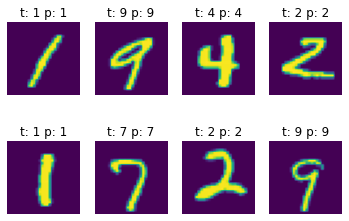

In [ ]:
import matplotlib.pyplot as plt

y_score = net(images)
# get predicted class from the class probabilities
_, y_pred = torch.max(y_score, 1)

print('Predicted: ', ' '.join('%5s' % classes[y_pred[j]] for j in range(8)))
rows = 2
columns = 4
# plot y_score - true label (t) vs predicted label (p)
fig2 = plt.figure()
for i in range(8):
    fig2.add_subplot(rows, columns, i+1)
    plt.title('t: ' + classes[labels[i].cpu()] + ' p: ' + classes[y_pred[i].cpu()])
    img = images[i] / 2 + 0.5     # this is to unnormalize the image
    img = torchvision.transforms.ToPILImage()(img.cpu())
    plt.axis('off')
    plt.imshow(img)
plt.show()


#### 4.5.5.1 Computing classification scores

We will now use the predictions to compute the accuracy, f1 score, precision and recall. These are scores commonly used to evaluate classification, in particular the f1 score is a good measure for datasets with imbalanced classes.

In [ ]:
# first convert tensors to numpy
y_true = labels.data.cpu().numpy()
y_pred = y_pred.data.cpu().numpy()

You can use sklearn classification metrics to calculate the scores - you will 
need to input the true labels, and predicted classes.

See https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics for more details.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
print('accuracy:', accuracy, ', f1 score:', f1, ', precision:', precision, ', recall:', recall)

accuracy: 1.0 , f1 score: 1.0 , precision: 1.0 , recall: 1.0


You should see 

## Ex 4 Optional Extras 

1. Try reducing the lines of code in the convolutional neural network class by grouping lines of code into `nn.Sequential` blocks. 
   - An example of your this can be done for linear layers is:
```
self.lin_blocks = nn.Sequential(
            nn.Linear(320, 50),
            nn.ReLU(),
            nn.Linear(50, 10),
            
        )
```
  - try swapping out the linear layers of the network for this sequnetal block
  - then create your own sequential convolutional blocks
2. Try adding dropout and batchnorm to your convolutional blocks
3. Try removing/changing/adding layers to see how it impacts performance



In [ ]:
# STUDENTS CODE HERE
# 4.1 copy and paste the network from above but this time swap out the conv->maxpool->relu operations (and linear layers) for sequential blocks

class MNIST_Sequential_Model(nn.Module):
    def __init__(self):
        super(MNIST_Sequential_Model, self).__init__()
        # 4.1 first sequential conv block
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5),
            nn.BatchNorm2d(10), # 4.2 adding optional batchnorm (num_features = number of output channels from previous convolution layer)
            nn.MaxPool2d(2),
            nn.ReLU()
        )

        # second sequential conv block
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(10, 20, kernel_size=5),
            nn.BatchNorm2d(20), # 4.2 adding optional batchnorm (num_features = number of output channels from previous convolution layer)
            nn.MaxPool2d(2),
            nn.ReLU(),
        )
        
        
        # lineaar sequential block
        self.lin_blocks = nn.Sequential(
         nn.Linear(320, 50),
         nn.ReLU(),
         nn.Linear(50, 10),
 
       )

      # (optional) dropout
        self.dropout=nn.Dropout2d() # could also go in sequential blocks of course
    
    def forward(self, x):
        # with sequential blocks the foward function reduces to
        x = self.conv_block1(x)
      #  x=self.dropout(x)
        x = self.conv_block2(x)
      #  x=self.dropout(x)
        x = x.view(x.size(0),-1) # still need to flatten before linear blocks
        x = self.lin_blocks(x)

        return F.log_softmax(x,dim=1)

    
net_seq = MNIST_Sequential_Model() 
print(net_seq)
net_seq = net_seq.to(device)

MNIST_Sequential_Model(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
  )
  (lin_blocks): Sequential(
    (0): Linear(in_features=320, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=10, bias=True)
  )
  (dropout): Dropout2d(p=0.5, inplace=False)
)


In [ ]:
# STUDENTS CODE HERE
# regenerate optimiser for this new network

optimizer = optim.SGD(net_seq.parameters(), lr=0.001, momentum=0.9)

# Now copy and pste training loop and run for the new network 

epochs = 1
for epoch in range(epochs): 

    # enumerate can be used to output iteration index i, as well as the data 
    for i, (data, labels) in enumerate(train_loader, 0):
        # STUDENTS CODE - replace Nones with correct code #

        # Task 3.5.1 load data and labels to device
        data = data.to(device)
        labels = labels.to(device)
        
        # clear the gradient
        optimizer.zero_grad()

        #Change the network!!!
        outputs = net_seq(data)

        #3.5.4 calculating the predicted and the expected loss
        loss = loss_fun(outputs, labels)

        #3.5.5 compute the gradient
        loss.backward()

        #3.5.6 update the parameters
        optimizer.step()

        # print statistics
        ce_loss = loss.item()
        if i % 100 == 0:
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, ce_loss))


[1,     1] loss: 2.376
[1,   101] loss: 1.452
[1,   201] loss: 0.940
[1,   301] loss: 0.286
[1,   401] loss: 0.226
[1,   501] loss: 0.141
[1,   601] loss: 0.109
[1,   701] loss: 0.069
[1,   801] loss: 0.210
[1,   901] loss: 0.082
[1,  1001] loss: 0.858
[1,  1101] loss: 0.192
[1,  1201] loss: 0.097
[1,  1301] loss: 0.037
[1,  1401] loss: 0.063
[1,  1501] loss: 0.057
[1,  1601] loss: 0.044
[1,  1701] loss: 0.017
[1,  1801] loss: 0.077
[1,  1901] loss: 0.257
[1,  2001] loss: 0.443
[1,  2101] loss: 0.038
[1,  2201] loss: 0.458
[1,  2301] loss: 0.059
[1,  2401] loss: 0.112
[1,  2501] loss: 0.035
[1,  2601] loss: 0.039
[1,  2701] loss: 0.024
[1,  2801] loss: 0.005
[1,  2901] loss: 0.015
[1,  3001] loss: 0.023
[1,  3101] loss: 0.004
[1,  3201] loss: 0.037
[1,  3301] loss: 0.039
[1,  3401] loss: 0.030
[1,  3501] loss: 0.008
[1,  3601] loss: 0.052
[1,  3701] loss: 0.066
[1,  3801] loss: 0.176
[1,  3901] loss: 0.019
[1,  4001] loss: 0.021
[1,  4101] loss: 0.137
[1,  4201] loss: 0.115
[1,  4301] 

Predicted:      4     1     4     9     0     2     6     0


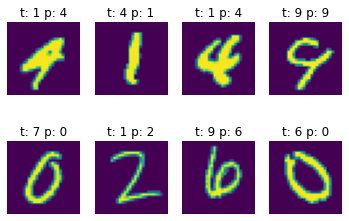

In [ ]:
# STUDENT CODE - test performance 

# keeping test batch constant for comparison

y_score = net_seq(images)
# get predicted class from the class probabilities
_, y_pred = torch.max(y_score, 1)

print('Predicted: ', ' '.join('%5s' % classes[y_pred[j]] for j in range(8)))
rows = 2
columns = 4
# plot y_score - true label (t) vs predicted label (p)
fig2 = plt.figure()
for i in range(8):
    fig2.add_subplot(rows, columns, i+1)
    plt.title('t: ' + classes[labels[i].cpu()] + ' p: ' + classes[y_pred[i].cpu()])
    img = images[i] / 2 + 0.5     # this is to unnormalize the image
    img = torchvision.transforms.ToPILImage()(img.cpu())
    plt.axis('off')
    plt.imshow(img)
plt.show()
